In [ ]:
! pip install importlib-metadata==4.13.0
! pip install xarray==0.20.1
! pip install --upgrade xarray cftime nc-time-axis
! pip install netCDF4

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 7.2.0
    Uninstalling importlib_metadata-7.2.0:
      Successfully uninstalled importlib_metadata-7.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.7/835.7 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Found existing installation: xarray 2023.7.0
    Uninstalling xarray-2023.7.0:
      Successfully uninstalled xarray-2023.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires xarray>=0.21.0, but you have xarray 0.20.1 which is incompatible.
xarray-einstats 0.7.0 requires xarray>=2022.09.0, but you have xarray 0.20.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: xarray
    Fo

In [ ]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import xarray as xr
import sys
import netCDF4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# plotting parameters
color_list = ['#000000', '#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3', 'm'] * 2
markersize = 6
linewidth = 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3,
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(color=color_list),
 'font.size': 16,
 'font.family': 'serif'}
plt.rcParams.update(cdds_params)

Load Data and Remove Seasonal Cycle


##***Make sure to update your file location in google drive!!!***





In [ ]:
#update file location in google drive
ds_pr = xr.open_dataset('/content/drive/MyDrive/global_data_processed_precip.nc')


ds_pr.load()

<xarray.Dataset> Size: 647kB
Dimensions:  (model: 26, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    pr       (model, time) float64 622kB 3.292e-05 3.256e-05 ... 3.435e-05

In [ ]:
#remove seasonal cycle
def remove_time_mean(x):
    return x - x.mean(dim='time')

ds_pr = ds_pr.groupby('time.month').apply(remove_time_mean)
ds_pr

<xarray.Dataset> Size: 647kB
Dimensions:  (model: 26, time: 2988)
Coordinates:
  * model    (model) <U16 2kB 'CanESM5' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
  * time     (time) datetime64[ns] 24kB 1851-01-31 1851-02-28 ... 2099-12-31
Data variables:
    pr       (model, time) float64 622kB -9.814e-07 -1.007e-06 ... 1.386e-06

##Weights

Load weights from temperature file (upload into notebook directly) OR use google drive

In [ ]:
#use google drive location from above
#or upload into document directly
weights_save = xr.open_dataarray('weights_temperature_reformatted.nc')


weights_save.load()

<xarray.DataArray 'weights' (pseudo_dropped: 26, models: 25)> Size: 5kB
array([[1.14180237e-03, 2.29694502e-01, 5.40656802e-02, 7.74687990e-07,
        3.35419391e-07, 4.44884282e-20, 4.00327964e-03, 8.87442982e-04,
        3.15666758e-04, 1.18763403e-09, 2.21587023e-14, 2.91649644e-12,
        9.20066201e-13, 3.70607525e-01, 1.37864923e-12, 8.93418516e-11,
        7.84714649e-03, 2.97250328e-01, 2.65387259e-03, 1.13154035e-11,
        2.40044749e-14, 1.75728248e-02, 8.94575268e-05, 1.38693603e-02,
        3.20179874e-12],
       [1.35842984e-16, 1.41777252e-05, 4.73641600e-03, 1.73354270e-03,
        7.17968431e-04, 1.44949872e-30, 2.42504293e-01, 9.29747581e-02,
        1.12968157e-01, 1.59775806e-07, 3.09858995e-17, 2.07023581e-12,
        3.52766063e-13, 7.79599941e-30, 2.25893082e-13, 1.92313895e-09,
        1.35584048e-01, 4.30338406e-06, 1.46300851e-01, 4.61191167e-11,
        5.84174368e-17, 2.09024981e-02, 1.32139065e-01, 1.09419760e-01,
        2.29916079e-12],
       [1.99309249e-02, 6.77548746e-03, 2.50507605e-01, 5.54141795e-06,
        2.31413641e-06, 7.29653393e-24, 4.55879325e-02, 1.06178611e-02,
        4.12140312e-03, 2.10060732e-09, 7.50336700e-16, 7.61368331e-13,
        1.94534938e-13, 5.99828475e-06, 2.19574108e-13, 7.78291226e-11,
        7.72981601e-02, 3.08633606e-01, 2.98576852e-02, 5.40573261e-12,
        9.64650725e-16, 1.21235635e-01, 1.16063876e-03, 1.24259204e-01,
...
        7.69703542e-02, 6.68758096e-02, 9.70141364e-22, 6.56140051e-02,
        1.05508958e-01, 3.02717503e-01, 5.44737546e-04, 1.08841751e-11,
        4.68277489e-08, 1.87254125e-08, 1.90537515e-31, 7.51619759e-09,
        2.47893495e-05, 3.66459560e-02, 2.16022536e-07, 6.22276173e-02,
        1.42539569e-06, 2.40132582e-11, 8.16534982e-03, 4.34269824e-02,
        9.05092039e-08],
       [4.81817176e-11, 6.27468367e-02, 4.92720376e-03, 1.59981980e-01,
        7.71096253e-06, 5.52779548e-06, 1.75835831e-35, 9.25723229e-02,
        8.50138599e-02, 5.60752705e-02, 2.85349811e-10, 8.02452936e-22,
        1.98001465e-16, 5.04675003e-17, 3.35692739e-21, 1.11051633e-17,
        1.84950587e-12, 1.60666279e-01, 2.30601094e-03, 9.59302543e-02,
        2.41465344e-14, 2.45827621e-21, 2.65299799e-01, 1.44669444e-02,
        3.88971144e-16],
       [6.43881281e-24, 2.45440913e-06, 1.11271948e-13, 2.40141398e-10,
        5.62293560e-03, 6.38324886e-03, 3.60767154e-03, 1.94850779e-07,
        4.75051402e-07, 4.46872719e-06, 1.36033964e-01, 9.20397886e-02,
        8.55453857e-02, 8.37146200e-02, 2.11581243e-33, 1.14183720e-01,
        1.94295227e-01, 5.12093593e-08, 2.85954740e-14, 1.73609683e-07,
        1.79226024e-01, 9.91889810e-02, 3.80893678e-09, 1.50588101e-04,
        2.30731496e-08]])
Dimensions without coordinates: pseudo_dropped, models

In [ ]:
W=list()
UW=list()
unweighted_dist=list()

#apply weights for each pseudo choice
for i_obs in range(26):
    #select pseudo weights from the saved weights
    weights=weights_save[i_obs,:]

    #select pseudo from the data
    ds_obs=ds_pr.isel(model=i_obs)

    #select all models but the pseudo from the data
    v=np.delete(np.arange(26), i_obs)
    ds_gcm=ds_pr.isel(model=v)

    #add the weights to the dataset
    ds_gcm=ds_gcm.assign({"weights": ("model",weights.data)})

    #apply the weights to the dataset
    ds_gcm=ds_gcm.assign(pr_fut_weights=ds_gcm.pr*ds_gcm.weights)

    #apply common baseline to the data
    #weights become 0 after this line but thats okay bc we already applied the weights and dont use the weights again
    ds_gcm = ds_gcm.sel(time=slice('2080', '2099')).mean(dim='time')-ds_gcm.sel(time=slice('1960', '2014')).mean(dim='time')

    #apply common baseline to the pseudo
    fut_period = ds_obs.sel(time=slice('2080', '2099')).mean(dim='time')-ds_obs.sel(time=slice('1960', '2014')).mean(dim='time')

    #find weighted mean difference
    y_w  =np.abs(fut_period - ds_gcm.pr_fut_weights.sum('model'))
    #find unweighted mean difference
    y_uw =np.abs(fut_period - ds_gcm.pr.mean('model'))

    #add to list for this pseudo choice and move onto the next pseudo choice
    W.append(y_w)
    UW.append(y_uw)


    unweighted = ds_gcm.pr
    unweighted_dist.append(unweighted)

Y_W = xr.concat(W, dim = 'model',coords='minimal',compat='override')
Y_UW = xr.concat(UW, dim = 'model',coords='minimal',compat='override')


In [ ]:
#reformat the lists holding weighted and unweighted means for plotting
weighted_distribution = Y_W.pr.values
unweighted_distribution = Y_UW.pr.values

# Relative Forecast Error

In [ ]:
#calculate relative forecast error
rfe = list()
for i in range(26):
  sigma_x = (unweighted_dist[i]**2).mean() - (unweighted_dist[i].mean())**2
  sigma_w = ((unweighted_dist[i])**2 * weights_save[i]).mean() - (((unweighted_dist[i]) * weights_save[i]).mean())**2

  divide = sigma_w / sigma_x
  rfe.append(divide)


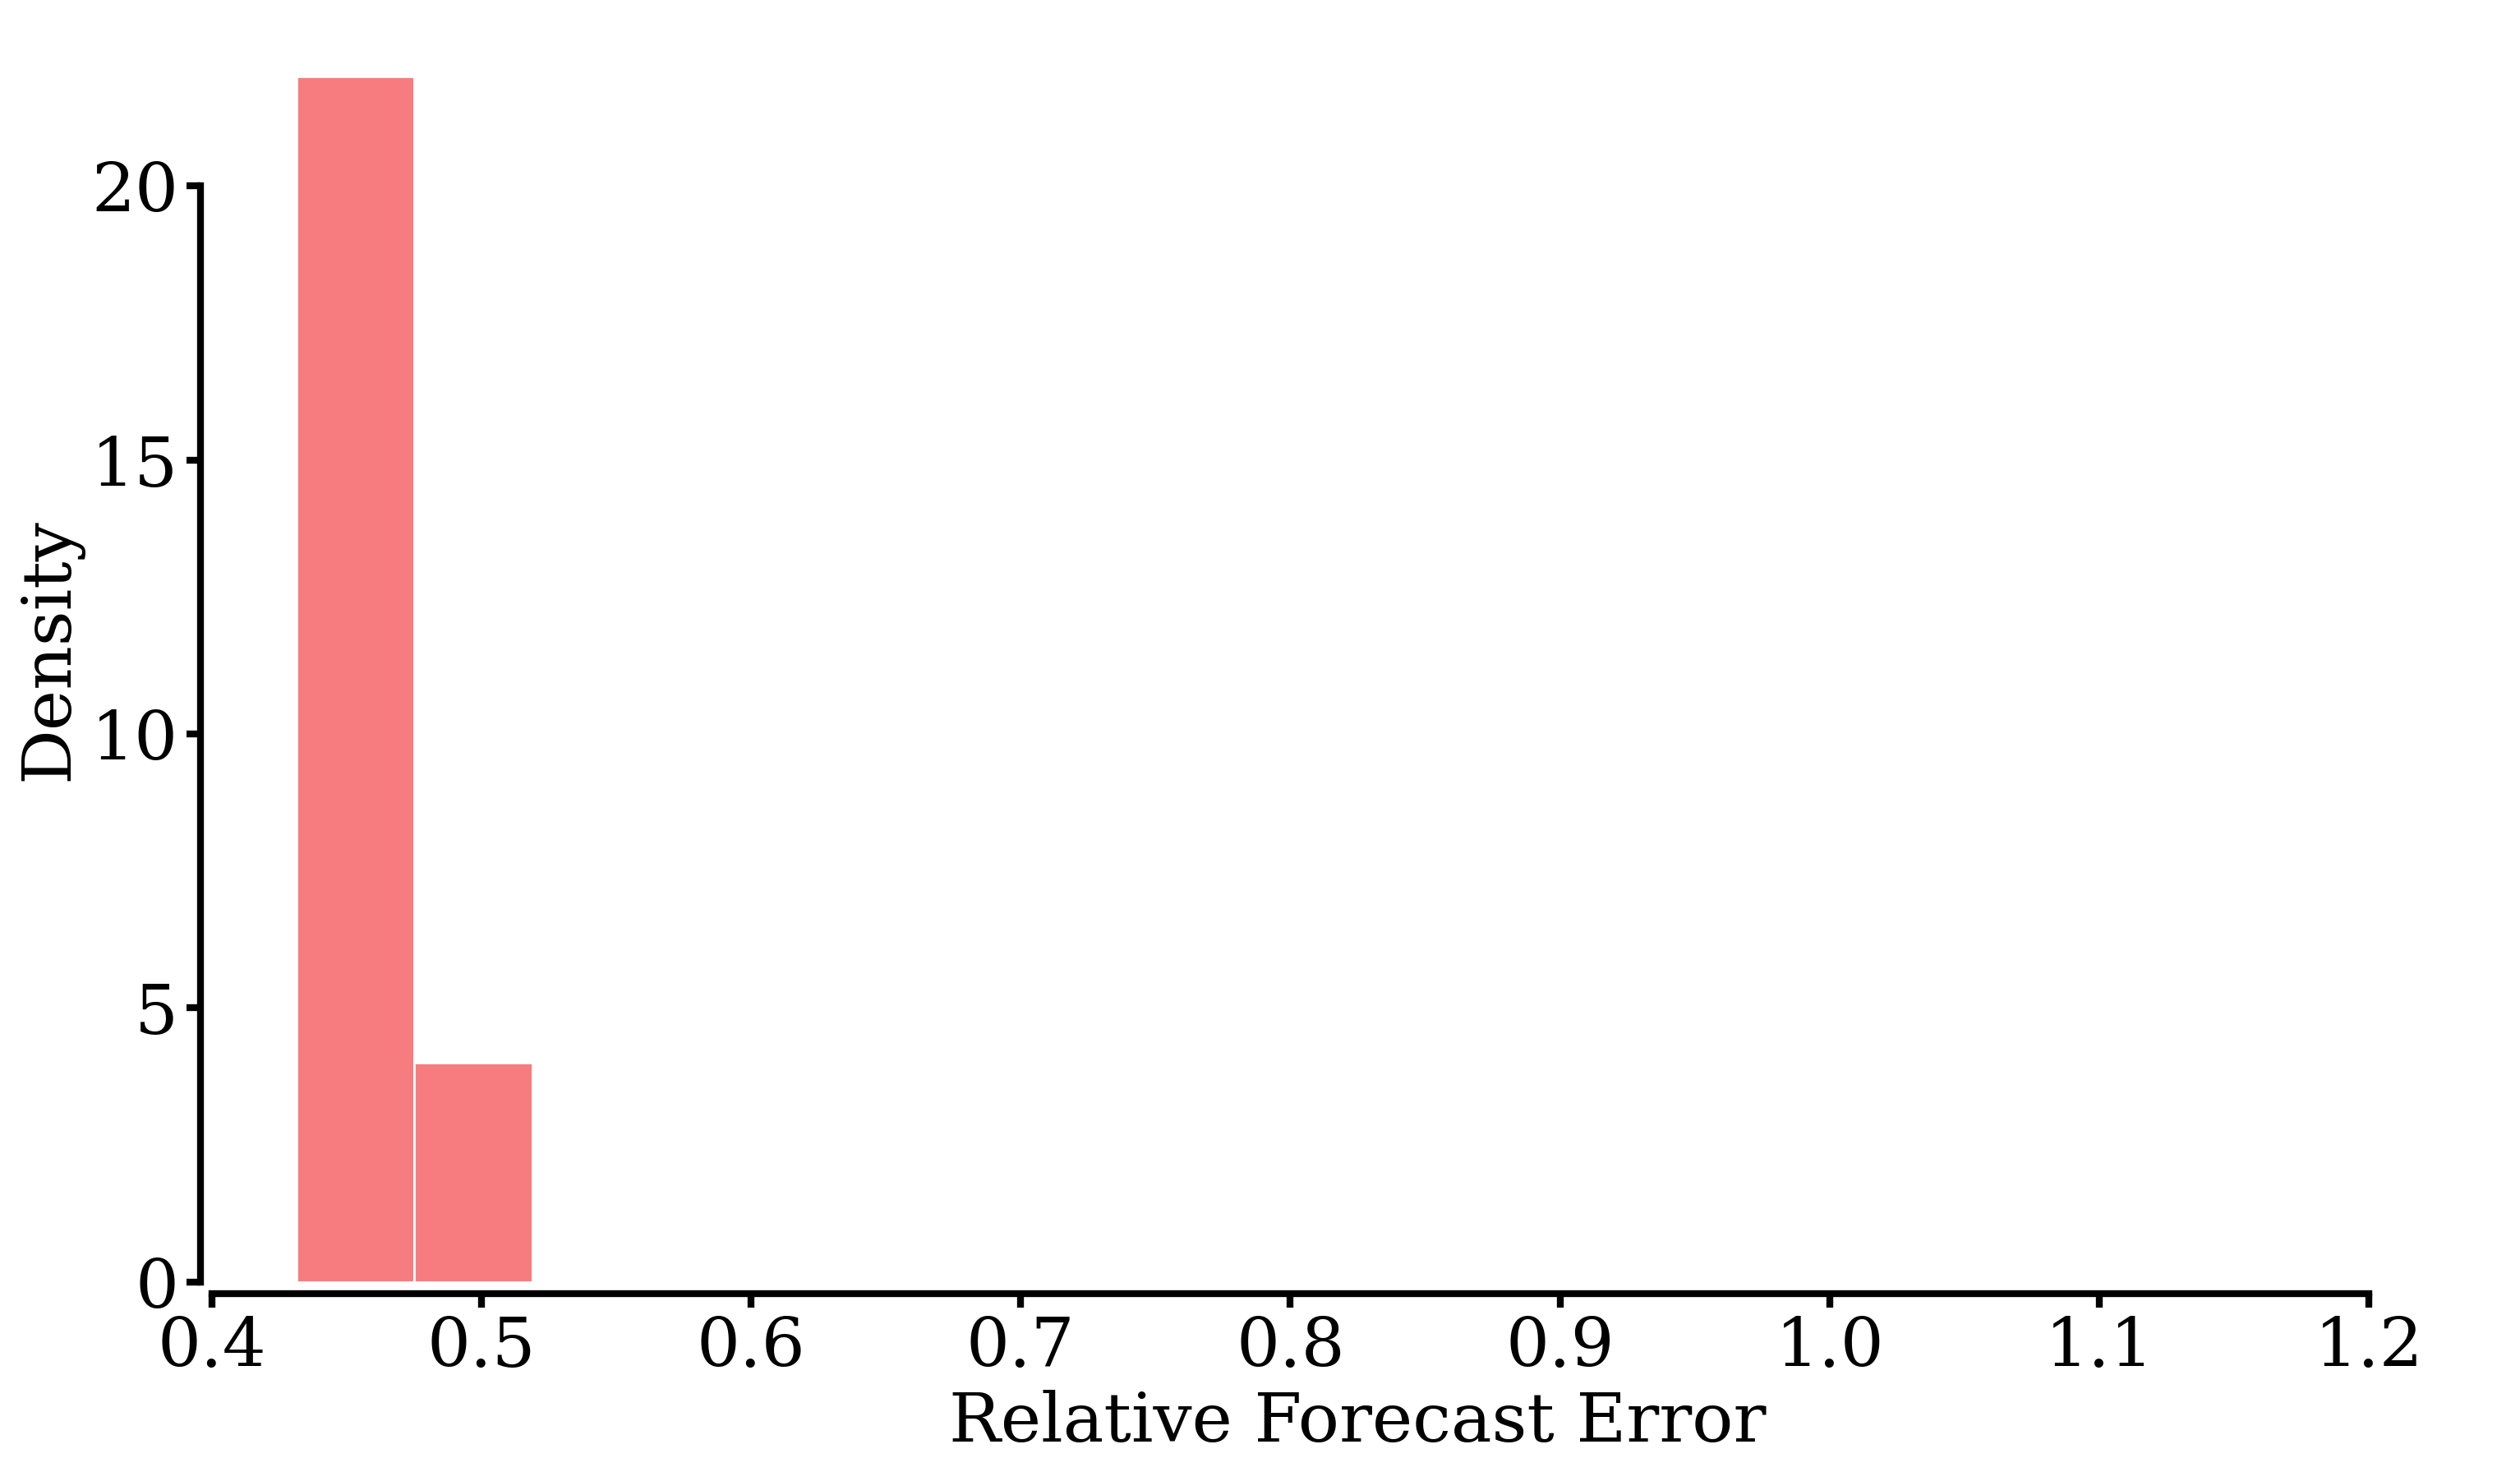

In [ ]:
#plot relative forecast error
plt.hist(rfe, bins = 2, color='#f77c80')

plt.ylabel("Density", fontsize = 30)
plt.xlabel("Relative Forecast Error", fontsize = 30)
plt.tick_params(axis='both', labelsize=30)

plt.xlim(0.4, 1.25)

sns.despine(trim=True, offset=5)

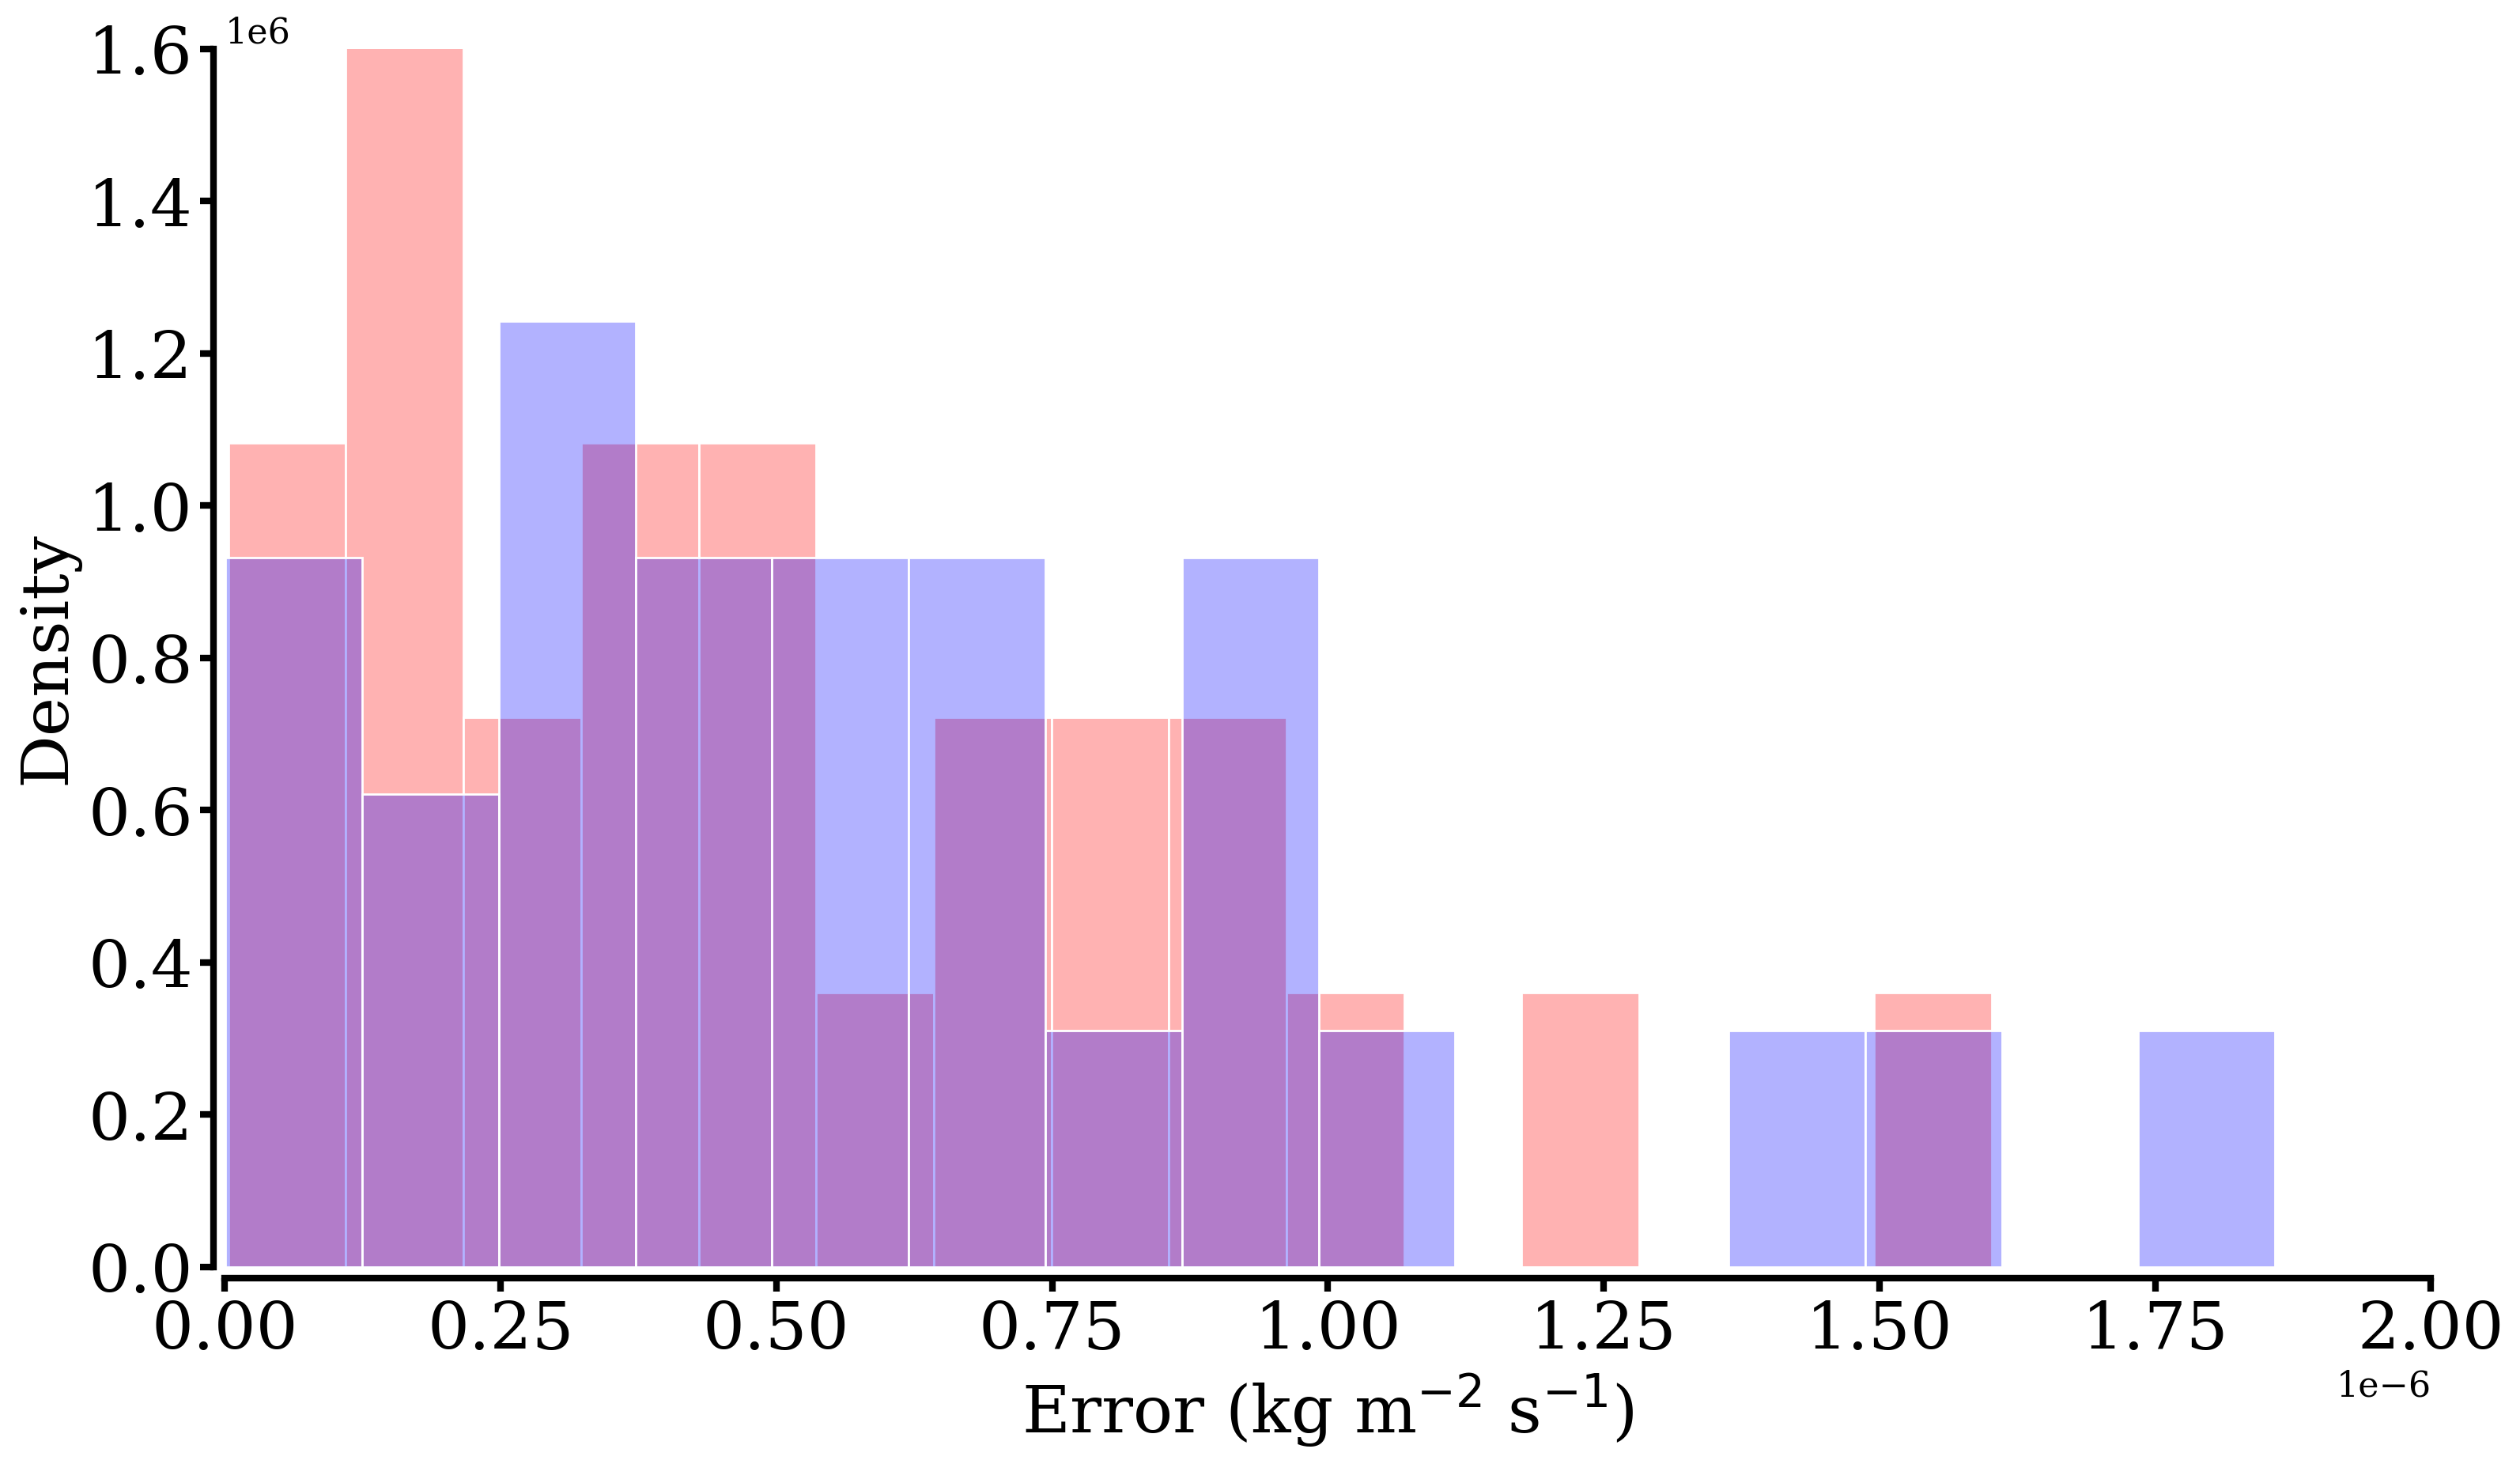

In [ ]:
import seaborn as sns

#plotting weighted and unweighted histograms on the same figure
sns.histplot(weighted_distribution, color="red", label='weighted', kde=False, stat="density", alpha=0.3, bins = 15)


sns.histplot(unweighted_distribution, color="blue", label='unweighted', kde=False, stat="density", alpha=0.3, bins = 15)


plt.xlim([0, 2e-6])
plt.ylim([0, 1.6e6])
plt.xlabel("Error (kg m$^{-2}$ s$^{-1}$)", fontsize = 30)
plt.ylabel("Density", fontsize = 30)

ax = plt.gca()
ax.tick_params(axis='both', labelsize=30)


sns.despine(trim=True, offset=5)
plt.show()

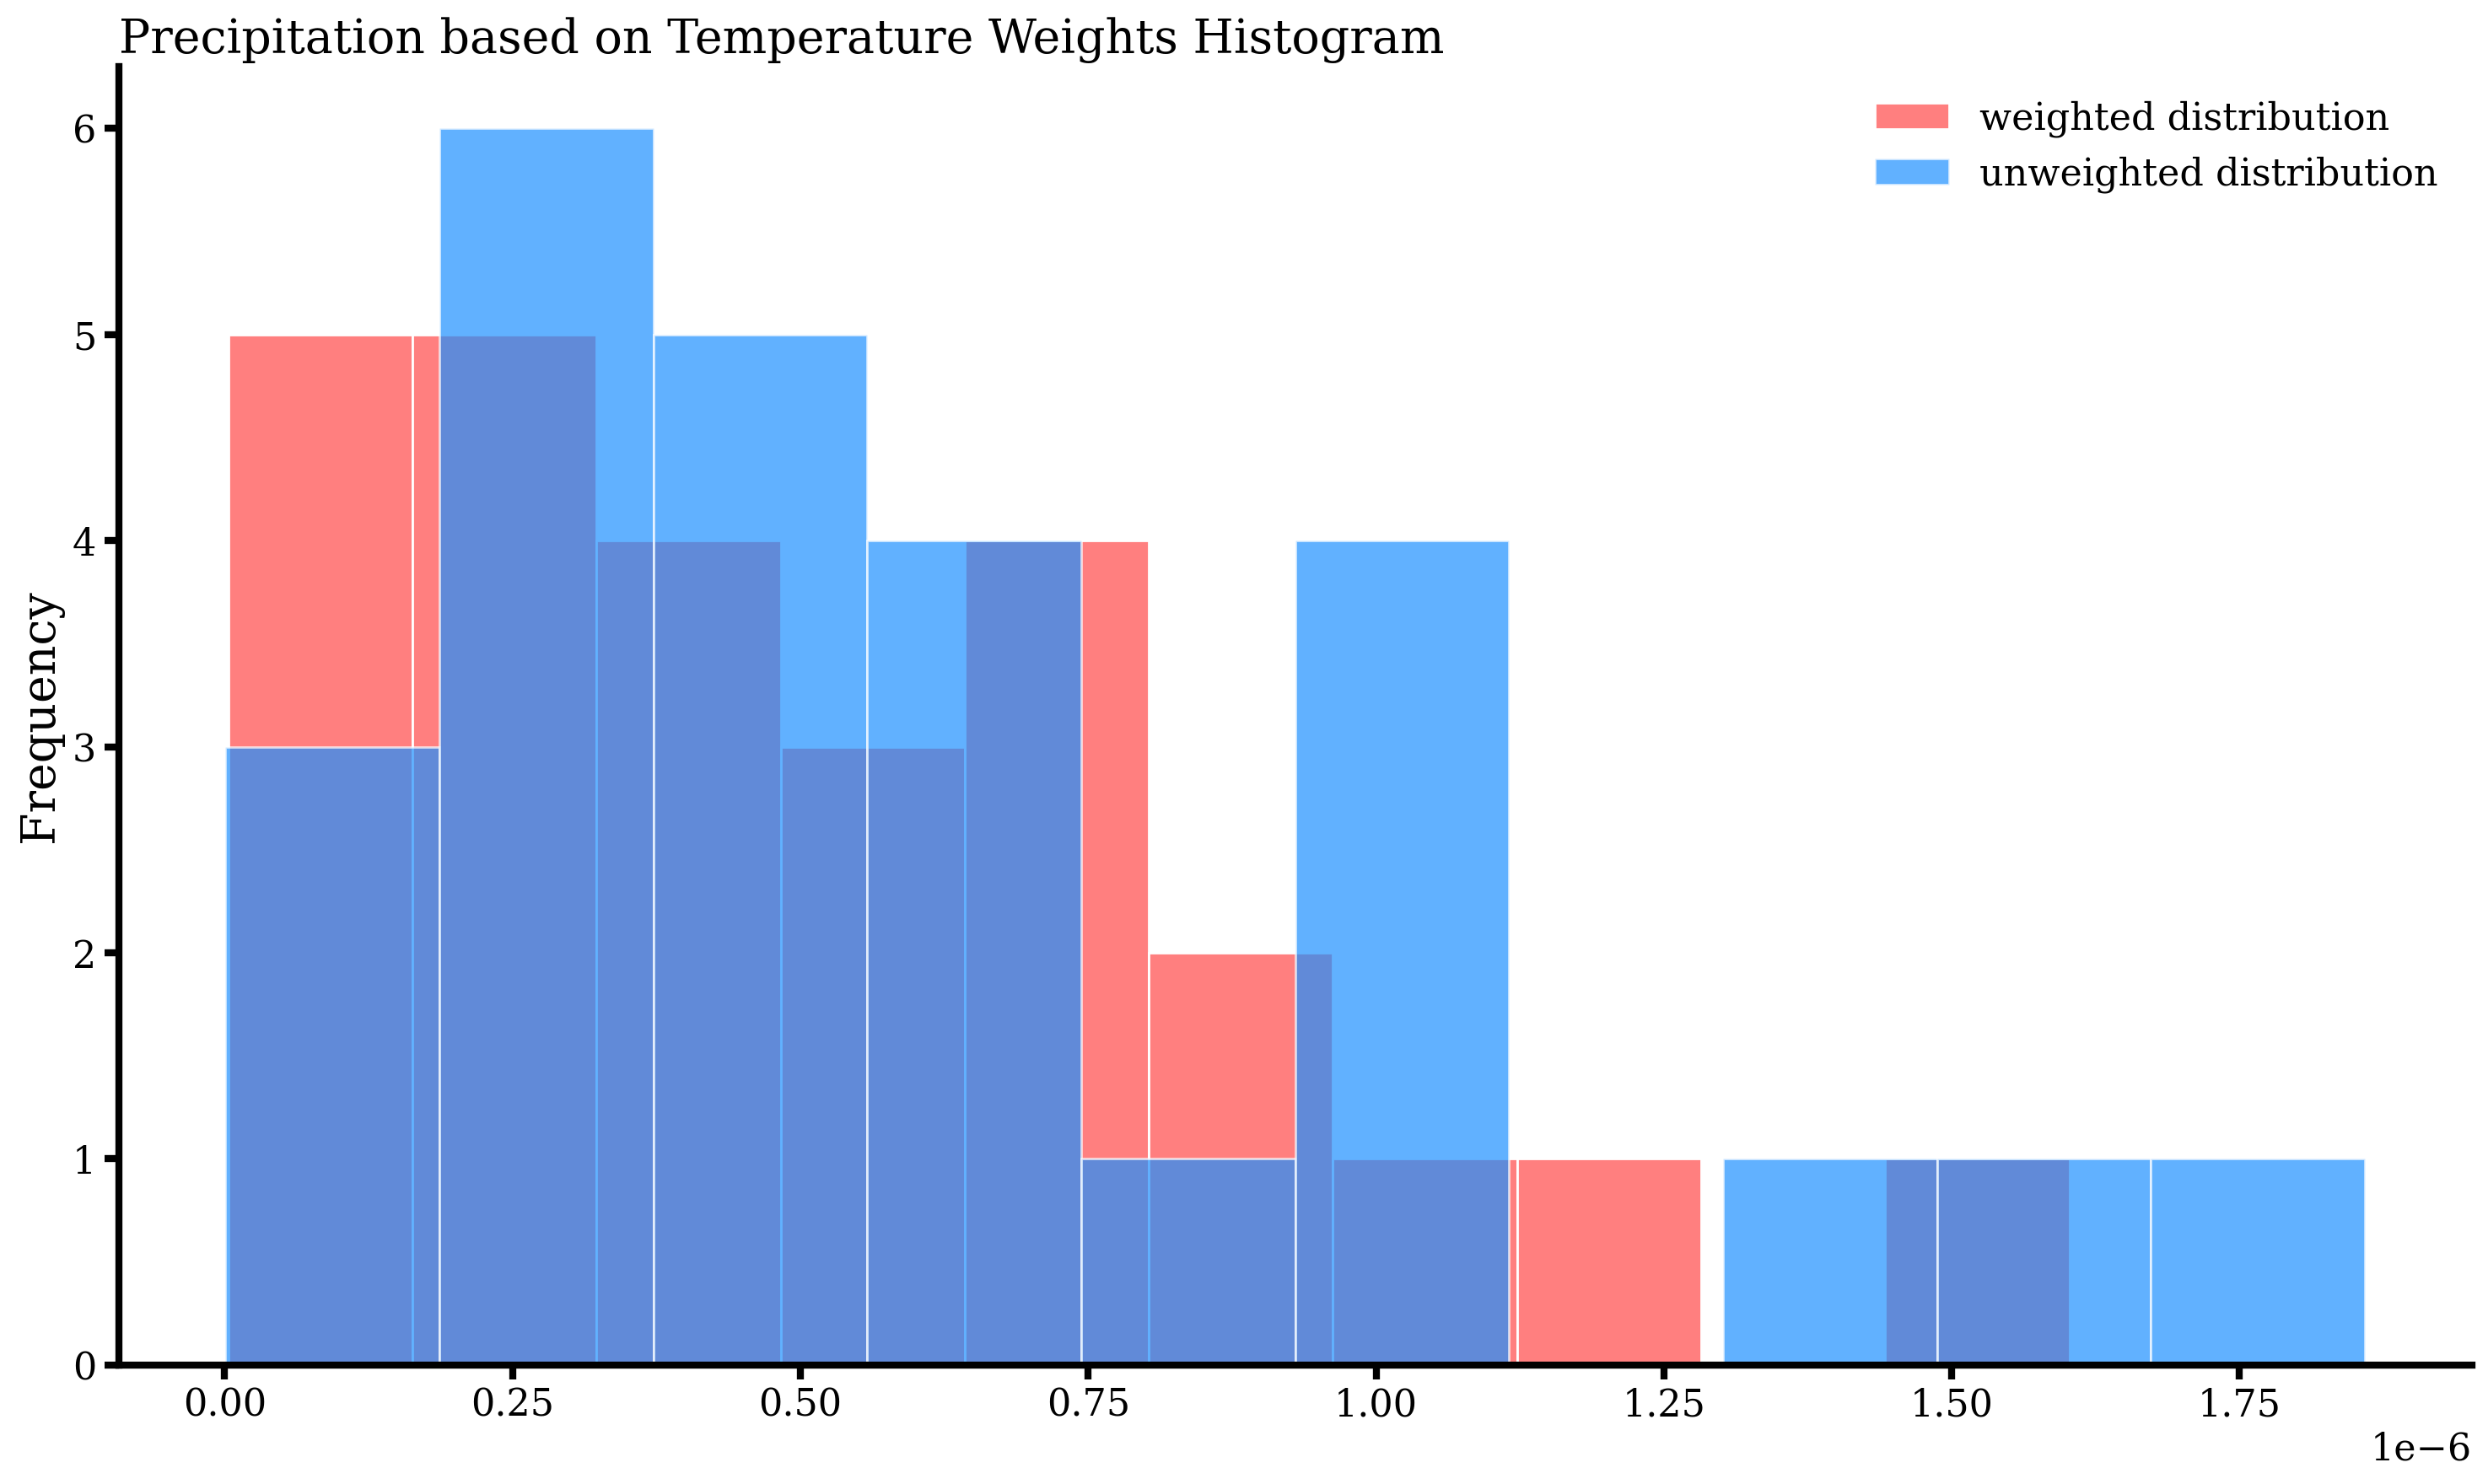

In [ ]:
plt.title("Precipitation based on Temperature Weights Histogram")
plt.ylabel("Frequency")

plt.hist(weighted_distribution, label="weighted distribution", color = '#FF7F7F')
plt.hist(unweighted_distribution, label="unweighted distribution", color = '#1E90FF', alpha=0.7)

plt.legend()

Compare Variance

In [ ]:
np.var(weighted_distribution)/np.var(unweighted_distribution)

0.706550885996748

Compare Median

In [ ]:
np.median(weighted_distribution)/np.median(unweighted_distribution)

0.7998354547186679

Compare RMSE

In [ ]:
RMSE = (weighted_distribution**2).mean()
RMSE = np.sqrt(RMSE)
RMSE

6.41876114891586e-07

In [ ]:
RMSE_unweighted = (unweighted_distribution**2).mean()
RMSE_unweighted = np.sqrt(RMSE_unweighted)
RMSE_unweighted

7.804359600469617e-07